<a href="https://colab.research.google.com/github/paesgo11-cmd/Estadistica2026B/blob/main/Estudiantes/Student_performance_c22150858.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#E  E R C I C I O   D E    R  E P O S I T O R  I  O
#     BASES DE DATOS: www.github.com

# D E S D E
link = "https://raw.githubusercontent.com/paesgo11-cmd/Estadistica2026B/refs/heads/main/Estudiantes/Student_Performance.csv"
import pandas as pd
df = pd.read_csv(link)
df

,horas_estudio,calificaciones_previas,actividades_extracurriculares,horas_sueño,Sample Question Papers Practiced,calificacion_final
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   horas_estudio                     10000 non-null  int64  
 1   calificaciones_previas            10000 non-null  int64  
 2   actividades_extracurriculares     10000 non-null  object 
 3   horas_sueño                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   calificacion_final                10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,horas_estudio,calificaciones_previas,horas_sueño,Sample Question Papers Practiced,calificacion_final
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
#1 Definir variables
x=df["calificaciones_previas"]
y=df["calificacion_final"]

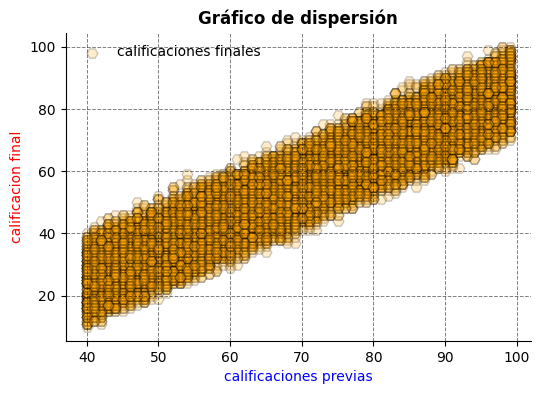

In [ ]:
#2
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="H",
    color="orange",
    edgecolor="black", #color de borde
    alpha=0.2, #transparencia
    s=60, #tamaño de punto
    label="calificaciones finales" #etiqueta
)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold", #bold:negritas
    color="black",
)
#Etiquetas eje x
plt.xlabel(
    "calificaciones previas",
    fontsize=10,
    color="blue"
)
#Etiqueta eje y
plt.ylabel(
    "calificacion final",
    fontsize=10,
    color="red"
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )

In [ ]:
# 3 P R E G U N T A : ¿Soporta la suposición de linealidad?
# SI, los datos muestran una tendencia lineal.

In [ ]:
#4 Calcula el coeficiente de correlación e interpreta el resultado
from scipy.stats import pearsonr
r, valor_p=pearsonr(x,y)
print(f"coeficiente de correlación (r):{r:0.4f}")
print(f"valor_p:{valor_p:0.4f}")

# Test de Pearson
# H0: rho = 0     (No hay correlación)
# H1: rho ≠ 0     (Sí hay correlación)
# alpha = 0.05

#     CONCLUSION DE PEARSON

#       COMO EL VALOR DE r ES IGUAL 0.9152, lo cual es diferente de 0
#       SE rechaza H0,POR LO CUAL se acepta H1 y hay correlación

coeficiente de correlación (r):0.9152
valor_p:0.0000


In [ ]:
#5 Calcule el coeficiente de determinación 0= r*r
print(f"coeficiente de determinación:{r**2:0.4f}")

coeficiente de determinación:0.8376


In [ ]:
#6 Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params

,0
const,-15.181799
calificaciones_previas,1.013837


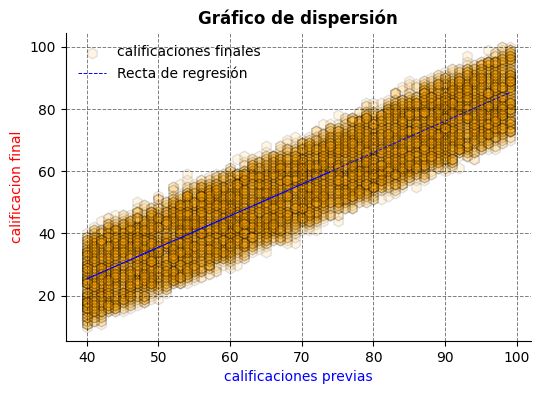

In [ ]:
#6 Obtenga la recta de regresión ajustada
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="h",
    color="orange",
    edgecolor="black", #color de borde
    alpha=0.1, #transparencia
    s=60, #tamaño de punto
    label="calificaciones finales",
    #etiqueta
)
plt.plot(
    x, y_calculada,
    color='blue',   # color de la línea
    linewidth=0.7,        # grosor de la línea
    linestyle='--',        # estilo de línea
    marker='o',           # marcador en cada punto
    markersize=0,         # tamaño del marcador
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)
#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "calificaciones previas",
    fontsize=10,
    color="blue"
)
#Etiqueta eje y
plt.ylabel(
    "calificacion final",
    fontsize=10,
    color="red"
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )


In [ ]:
#7 Intervalo de confianza
modelo.conf_int(alpha=0.05)

,0,1
const,-15.808290,-14.555309
calificaciones_previas,1.005084,1.022589


In [ ]:
# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,

# Los residuales son la diferencia entre el valor real y el valor que da el
# modelo

#1 residuales = y - y_calculada
residuales = modelo.resid

residuales

,0
0,5.811966
1,-2.952810
2,8.476128
3,-1.537709
4,5.144047
...,...
9995,-11.496199
9996,8.296251
9997,5.033353
9998,11.839639


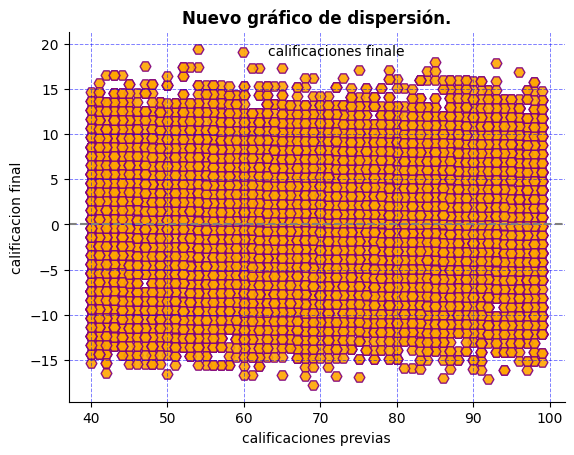

In [ ]:
#    8
#Residuales
residuales=modelo.resid
plt.scatter(
    x,residuales,
    marker="H",
    color="orange",
    edgecolor="purple", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="calificaciones finale" #etiqueta
)

#Título
plt.title(
    "Nuevo gráfico de dispersión.",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "calificaciones previas",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "calificacion final",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="blue"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )

plt.axhline(y=0, color="gray", linestyle="--") #linea horizontal

In [ ]:
#8.-pregunta: ¿Parece que se verifican los supuestos?

#   Los residuos se distribuyen de manera dispersa alrededor
#   de la línea cero y no tienen un patrón marcado, por lo cual se
#   cumple la linealidad y homocedasticidad.

In [ ]:
#9 Test de Shapiro
from scipy.stats import shapiro
estadistico, valor_p=shapiro(residuales)
print(f"Valor_p: {valor_p:0.4f}")

# Test de Shapiro-Wilk
# H0: Hay normalidad mayor
# H1: No hay normalidad menor
# alpha = 0.05

# c o n c l u s i o n
# Como el valor p es mayor a nivel de significacia, valor P> alpha
# 0.0000 menor a  0.05


# REVISAR
# Entonces la hipotesis nula no se rechaza
#Los datos siguen una distribución normal

Valor_p: 0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#10 Test de Breusch-Pagan
# alpha = 0.05

from statsmodels.stats.api import het_breuschpagan
estadistico_1, valor_p_1, estadistico_2, valor_p_2 = het_breuschpagan(residuales, x_constante)
print(f"valor_p:{valor_p_1:0.4f}")

#REVISAR
# Ho: No hay heterocedasticidad (varianza uniforme)
# H1: Hay heterocedasticidad (varianza no uniforme)

# c o n c l u s i o n
# Como el valor P es mayor a el nivel de significancia,
# 0.1744 > 0.05
# entoces Ho no se rechaza, por lo cual, se deduce que
# No hay heterocedasticidad, hay homocedasticidad o la varianza es uniforme

valor_p:0.1744


In [ ]:
#11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados.
df.describe()

,horas_estudio,calificaciones_previas,horas_sueño,Sample Question Papers Practiced,calificacion_final
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
modelo.params

,0
const,-15.181799
calificaciones_previas,1.013837


In [ ]:
#f(x)= -15.181799 + 1.013837 x (constante y complemento)
#  x= gastos generales [1.000,9.000] minimo y maximo

# Intrapolación y extrapolación
#f(x)= 1.000 al 9.000

#f(1)= -15.181799 + 1.013837 (2.000)
#                         = (INTERPOLAR)

#(2)= -15.181799 + 1.013837 (5.000)
#                        = (INTERPOLAR)

#f(3)= -15.181799 + 1.013837 (11.000)
#                         = (EXTRAPOLAR)

In [ ]:
#11 REVISAR   INTER
modelo.predict([1,2.000])

array([-13.15412602])

In [ ]:
#11 REVISAR   INTER
modelo.predict([1,5.000])

array([-10.11261592])

In [ ]:
#11 REVISAR   EXTRAPO
modelo.predict([1,11.000])

array([-4.02959571])

In [ ]:
#12 Realice una tabla ANOVA e interprete el resultado.

# test de ANOVA (Analysis of Variance)    REVISANDO ( F	/ PR(>F)  )
# H0: beta_1 = 0   (No hay correlación entre las variables)
# H1: beta_1 ≠ 0   (Sí hay correlación entre las variables)

#                     Y ~ X

from statsmodels.formula.api import ols
modelo_lineal = ols('calificacion_final~calificaciones_previas', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

# c o n c l u s i o n
#   Como p < 0.05, Se dice que se rechaza H₀,
#   por lo cual Sí hay correlacion entre la categoría
#   de las calificaciones previas y las calificaciones finales.

,df,sum_sq,mean_sq,F,PR(>F)
calificaciones_previas,1.0,3.091353e+06,3.091353e+06,51555.110025,0.0
Residual,9998.0,5.995012e+05,5.996211e+01,NaN,NaN


In [ ]:
# c o n c l u s i o n
#   Como p < 0.05, Se dice que se rechaza H₀,
#   por lo cual Sí hay correlacion entre la categoría
#   de las calificaciones previas y las calificaciones finales.